Arreglo original: [42, 7, 89, 15, 63, 2, 31, 55, 98, 12]
Arreglo ordenado: [2, 7, 12, 15, 31, 42, 55, 63, 89, 98]
Iniciando pruebas de alto rendimiento
n=10         | Tiempo:    0.00007s | RAM:     283.02 MB
n=100        | Tiempo:    0.00076s | RAM:       0.01 MB
n=1000       | Tiempo:    0.00986s | RAM:       0.04 MB
n=10000      | Tiempo:    0.10991s | RAM:       0.35 MB
n=100000     | Tiempo:    1.12628s | RAM:       2.69 MB
n=1000000    | Tiempo:    9.89185s | RAM:      33.20 MB


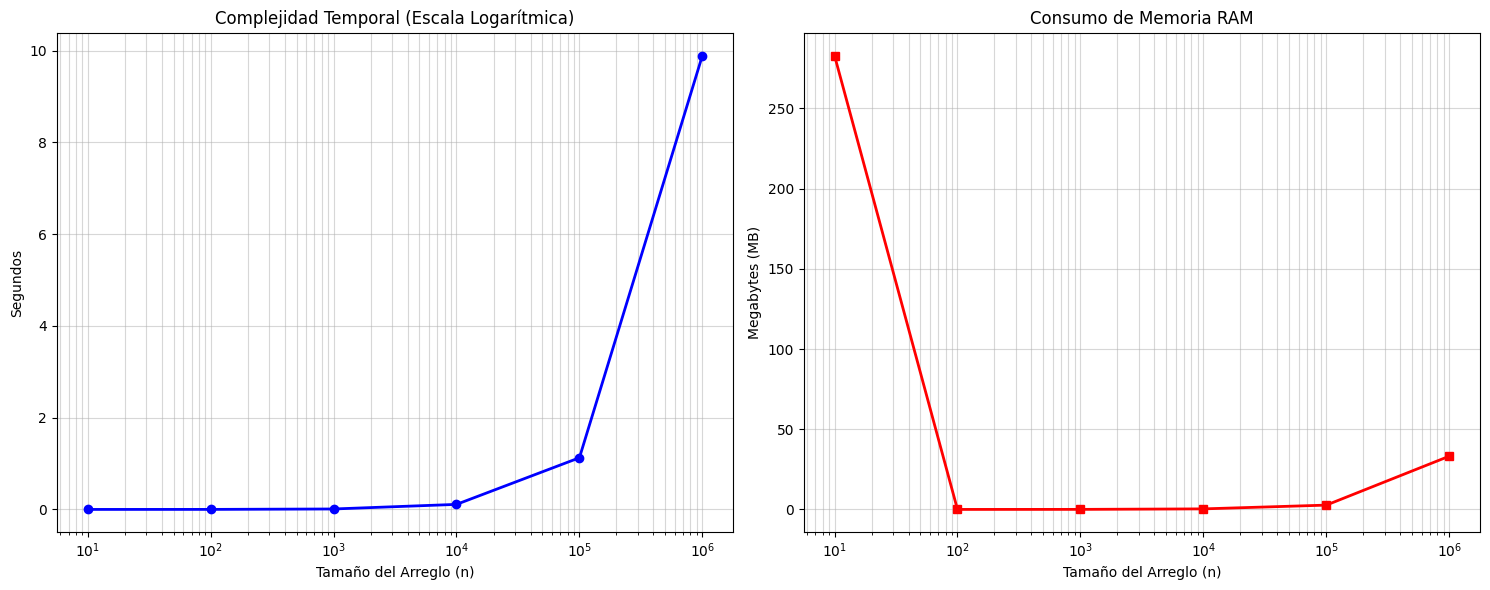

In [12]:
#Quick Sort en Python
import time
import tracemalloc
import random
import sys
import matplotlib.pyplot as plt
 

arr = [42, 7, 89, 15, 63, 2, 31, 55, 98, 12]

def ord_quick(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[len(arr) // 2]
        izq = [x for x in arr if x < pivot]
        centr = [x for x in arr if x == pivot]
        der = [x for x in arr if x > pivot]
        return ord_quick(izq) + centr + ord_quick(der)
    
print(f"Arreglo original: {arr}")
resultado = ord_quick(arr)
print("Arreglo ordenado:", resultado)




# --- IMPORTANTE: Aumentar el límite de recursión para n=10,000,000 ---
sys.setrecursionlimit(2000000)

# 1. Tu función Quick Sort
def ord_quick(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[len(arr) // 2]
        izq = [x for x in arr if x < pivot]
        centr = [x for x in arr if x == pivot]
        der = [x for x in arr if x > pivot]
        return ord_quick(izq) + centr + ord_quick(der)

# 2. Configuración actualizada (¡Cuidado con la RAM!)
tamanos = [10, 100, 1000, 10000, 100000, 1000000]
tiempos = []
memoria = []

print("Iniciando pruebas de alto rendimiento")

for n in tamanos:
    # Generar arreglo aleatorio
    lista_prueba = [random.randint(0, 1000000) for _ in range(n)]
    
    tracemalloc.start()
    inicio_t = time.time()
    
    # Ejecutamos (Guardamos el resultado para asegurar que se procese)
    ord_quick(lista_prueba)
    
    fin_t = time.time()
    pico_memoria = tracemalloc.get_traced_memory()[1] / 1024 / 1024 # Convertido a MB para mejor lectura
    tracemalloc.stop()
    
    tiempos.append(fin_t - inicio_t)
    memoria.append(pico_memoria)
    
    print(f"n={n:<10} | Tiempo: {fin_t - inicio_t:>10.5f}s | RAM: {pico_memoria:>10.2f} MB")

# 3. GENERACIÓN DE GRÁFICAS (Con escala logarítmica)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfica de Tiempo
ax1.plot(tamanos, tiempos, marker='o', color='b', linewidth=2)
ax1.set_xscale('log') # Escala logarítmica para ver todos los puntos
ax1.set_title('Complejidad Temporal (Escala Logarítmica)')
ax1.set_xlabel('Tamaño del Arreglo (n)')
ax1.set_ylabel('Segundos')
ax1.grid(True, which="both", ls="-", alpha=0.5)

# Gráfica de Memoria
ax2.plot(tamanos, memoria, marker='s', color='r', linewidth=2)
ax2.set_xscale('log')
ax2.set_title('Consumo de Memoria RAM')
ax2.set_xlabel('Tamaño del Arreglo (n)')
ax2.set_ylabel('Megabytes (MB)')
ax2.grid(True, which="both", ls="-", alpha=0.5)

plt.tight_layout()
plt.show()

arreglo original: [42, 7, 89, 15, 63, 2, 31, 55, 98, 12]
arreglo ordenado: [2, 7, 12, 15, 31, 42, 55, 63, 89, 98]

Iniciando pruebas de alto rendimiento para Merge Sort...
n=10         | Tiempo:    0.00016s | RAM:       0.96 MB
n=100        | Tiempo:    0.00072s | RAM:       0.00 MB
n=1000       | Tiempo:    0.01739s | RAM:       0.02 MB
n=10000      | Tiempo:    0.42655s | RAM:       0.16 MB
n=100000     | Tiempo:    4.00167s | RAM:       1.65 MB
n=1000000    | Tiempo:   48.13692s | RAM:      16.01 MB


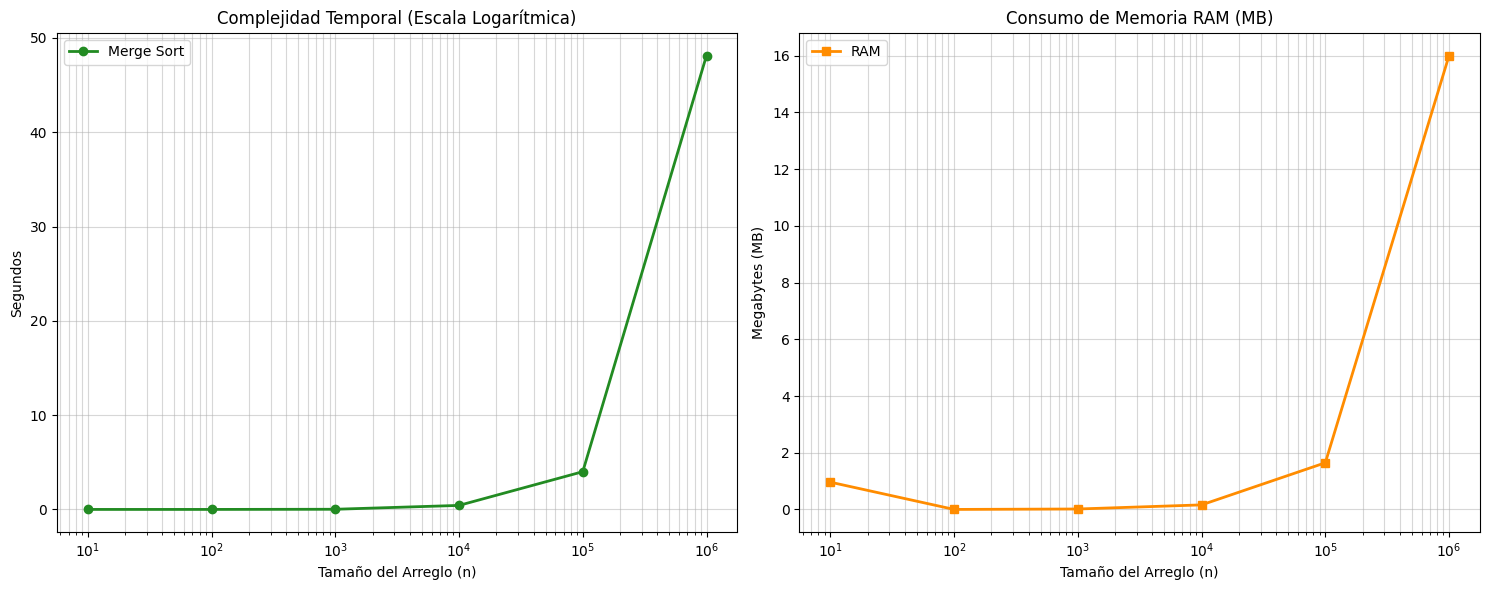

In [14]:
#Mezcla en Python
import time
import tracemalloc
import random
import sys
import matplotlib.pyplot as plt

arr = [42, 7, 89, 15, 63, 2, 31, 55, 98, 12]

def ord_mezla(arr):
   
    if len(arr) == 1 or len(arr) == 0:
        return arr

    mitad = len(arr) // 2
    
    m_izquierda = ord_mezla(arr[:mitad])
    m_derecha = ord_mezla(arr[mitad:])

    return mezclar(m_izquierda, m_derecha)

def mezclar(izq, der):
    res = []
    ind_izq = 0
    ind_der = 0
    
    while ind_izq < len(izq) and ind_der < len(der):
        if izq[ind_izq] < der[ind_der]:
            res.append(izq[ind_izq])
            ind_izq += 1
        else:
            res.append(der[ind_der])
            ind_der += 1
            
    res.extend(izq[ind_izq:])
    res.extend(der[ind_der:])
    return res

print("arreglo original:", arr)
final_arr = ord_mezla(arr)
print("arreglo ordenado:", final_arr)


# --- INICIO DEL LABORATORIO DE RENDIMIENTO ---

# 2. Configuración de tamaños (Hasta 1,000,000)
tamanos = [10, 100, 1000, 10000, 100000, 1000000]
tiempos = []
memoria = []

print("\nIniciando pruebas de alto rendimiento para Merge Sort...")

for n in tamanos:
    # Generar arreglo aleatorio
    lista_prueba = [random.randint(0, 1000000) for _ in range(n)]
    
    tracemalloc.start()
    inicio_t = time.time()
    
    # Ejecutamos el algoritmo
    ord_mezla(lista_prueba)
    
    fin_t = time.time()
    # Capturamos el pico de memoria y lo pasamos a MB
    pico_memoria = tracemalloc.get_traced_memory()[1] / 1024 / 1024 
    tracemalloc.stop()
    
    tiempos.append(fin_t - inicio_t)
    memoria.append(pico_memoria)
    
    print(f"n={n:<10} | Tiempo: {fin_t - inicio_t:>10.5f}s | RAM: {pico_memoria:>10.2f} MB")

# 3. GENERACIÓN DE GRÁFICAS (Con escala logarítmica)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfica de Tiempo
ax1.plot(tamanos, tiempos, marker='o', color='forestgreen', linewidth=2, label='Merge Sort')
ax1.set_xscale('log') # Escala logarítmica para ver todos los puntos
ax1.set_title('Complejidad Temporal (Escala Logarítmica)')
ax1.set_xlabel('Tamaño del Arreglo (n)')
ax1.set_ylabel('Segundos')
ax1.grid(True, which="both", ls="-", alpha=0.5)
ax1.legend()

# Gráfica de Memoria
ax2.plot(tamanos, memoria, marker='s', color='darkorange', linewidth=2, label='RAM')
ax2.set_xscale('log')
ax2.set_title('Consumo de Memoria RAM (MB)')
ax2.set_xlabel('Tamaño del Arreglo (n)')
ax2.set_ylabel('Megabytes (MB)')
ax2.grid(True, which="both", ls="-", alpha=0.5)
ax2.legend()

plt.tight_layout()
plt.show()

Arreglo original: [42, 7, 89, 15, 63, 2, 31, 55, 98, 12]
Arreglo ordenado: [2, 7, 12, 15, 31, 42, 55, 63, 89, 98]

Iniciando pruebas de alto rendimiento para Burbuja...
n=10         | Tiempo:    0.00005s | RAM:       0.80 KB
n=100        | Tiempo:    0.00084s | RAM:       0.08 KB
n=1000       | Tiempo:    2.41203s | RAM:       3.94 KB
n=10000      | Tiempo:  244.33201s | RAM:       3.75 KB


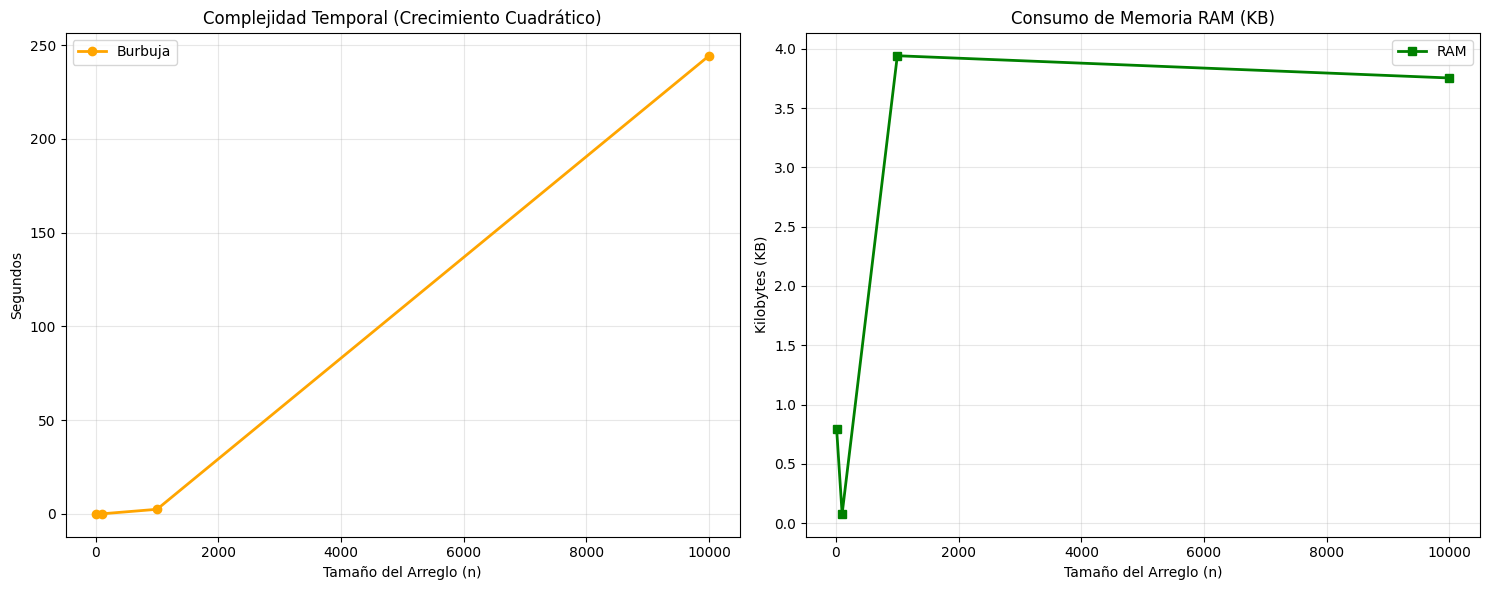

In [ ]:
#ordenamiento burbuja en Python
import time
import tracemalloc
import random
import sys
import matplotlib.pyplot as plt

def ordenamiento_burbuja(arr):

    tam = len(arr)
    inter = True

    while inter:
        inter = False       
        for i in range(tam - 1):
            if arr[i] > arr[i+1]:          
                arr[i], arr[i+1] = arr[i+1], arr[i] 
                inter = True      
    return arr

arr = [42, 7, 89, 15, 63, 2, 31, 55, 98, 12]
print(f"Arreglo original: {arr}")
arr_ordenado = ordenamiento_burbuja(arr) 
print(f"Arreglo ordenado: {arr_ordenado}")

# --- INICIO DEL LABORATORIO DE RENDIMIENTO ---

# 2. Configuración de tamaños
# NOTA: Para Burbuja usamos hasta 20k para que la prueba termine en segundos.
# Si pones 1,000,000 aquí, el programa no terminará hoy.
tamanos = [10, 100, 1000, 10000]
tiempos = []
memoria = []

print("\nIniciando pruebas de alto rendimiento para Burbuja...")

for n in tamanos:
    # Generar arreglo aleatorio
    lista_prueba = [random.randint(0, 1000000) for _ in range(n)]
    
    tracemalloc.start()
    inicio_t = time.time()
    
    # Ejecutamos el algoritmo
    ordenamiento_burbuja(lista_prueba)
    
    fin_t = time.time()
    # Capturamos el pico de memoria en KB (Burbuja casi no gasta RAM extra)
    pico_memoria = tracemalloc.get_traced_memory()[1] / 1024 
    tracemalloc.stop()
    
    tiempos.append(fin_t - inicio_t)
    memoria.append(pico_memoria)
    
    print(f"n={n:<10} | Tiempo: {fin_t - inicio_t:>10.5f}s | RAM: {pico_memoria:>10.2f} KB" )

# 3. GENERACIÓN DE GRÁFICAS
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfica de Tiempo (Aquí verás la parábola del O(n^2))
ax1.plot(tamanos, tiempos, marker='o', color='orange', linewidth=2, label='Burbuja')
ax1.set_title('Complejidad Temporal (Crecimiento Cuadrático)')
ax1.set_xlabel('Tamaño del Arreglo (n)')
ax1.set_ylabel('Segundos')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Gráfica de Memoria
ax2.plot(tamanos, memoria, marker='s', color='green', linewidth=2, label='RAM')
ax2.set_title('Consumo de Memoria RAM (KB)')
ax2.set_xlabel('Tamaño del Arreglo (n)')
ax2.set_ylabel('Kilobytes (KB)')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

Arreglo: [42, 7, 89, 15, 63, 2, 31, 55, 98, 12]
Arreglo ordenado: [2, 7, 12, 15, 31, 42, 55, 63, 89, 98]
¡Número 55 encontrado en el índice 7!
 Iniciando pruebas con números aleatorios existentes...
n=10         | Buscado: 58       | Tiempo:  0.0000098s | RAM:     0.00 KB
n=100        | Buscado: 534      | Tiempo:  0.0000045s | RAM:     0.00 KB
n=1000       | Buscado: 4545     | Tiempo:  0.0000463s | RAM:     0.16 KB
n=10000      | Buscado: 72591    | Tiempo:  0.0000455s | RAM:     0.16 KB
n=100000     | Buscado: 223946   | Tiempo:  0.0000679s | RAM:     0.16 KB
n=1000000    | Buscado: 3834223  | Tiempo:  0.0001316s | RAM:     0.16 KB


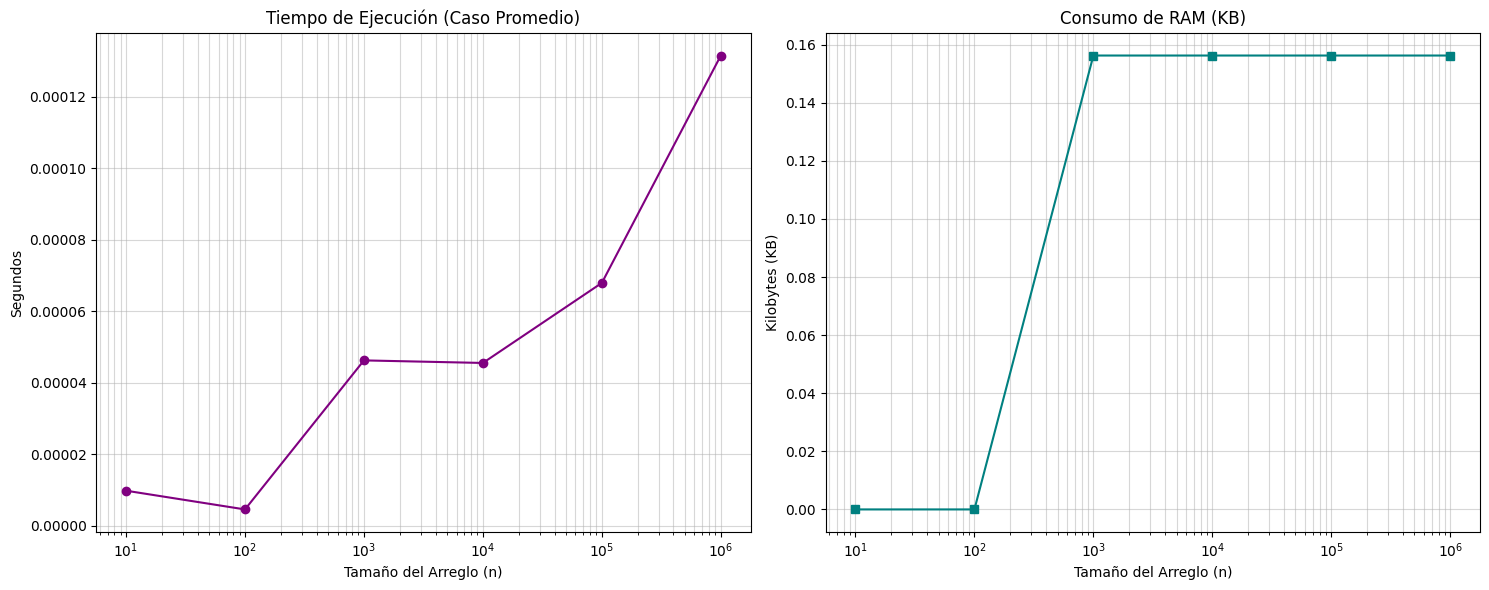

In [19]:
#Busqueda binaria en Python
import time
import tracemalloc
import random
import sys
import matplotlib.pyplot as plt

arr = [42, 7, 89, 15, 63, 2, 31, 55, 98, 12]
numero_a_buscar = int(input("Ingrese el número que desea buscar: "))

def ord_quick(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[len(arr) // 2]
        izq = [x for x in arr if x < pivot]
        centr = [x for x in arr if x == pivot]
        der = [x for x in arr if x > pivot]
        return ord_quick(izq) + centr + ord_quick(der)
    
resultado = ord_quick(arr)
print(f"Arreglo: {arr}")
print(f"Arreglo ordenado: {resultado}")


def busqueda_binaria(arreglo, objetivo):
    inicio = 0
    fin = len(arreglo) - 1
    
    while inicio <= fin:
  
        medio = (inicio + fin) // 2
        
        if arreglo[medio] == objetivo:
            return medio

        elif arreglo[medio] < objetivo:
            inicio = medio + 1
       
        else:
            fin = medio - 1
        
    return -1

resultado = busqueda_binaria(resultado, numero_a_buscar)


if resultado != -1:
    print(f"¡Número {numero_a_buscar} encontrado en el índice {resultado+1}!")
else:
    print("El número no existe en el arreglo.")


# 2. Configuración del Laboratorio
tamanos = [10, 100, 1000, 10000, 100000, 1000000]
tiempos = []
memoria = []

print(" Iniciando pruebas con números aleatorios existentes...")

for n in tamanos:
    # Generar y ordenar el arreglo (esto no se mide)
    lista_base = [random.randint(0, n * 10) for _ in range(n)]
    lista_lista = sorted(lista_base) 
    
    # --- LA CLAVE: Elegimos un número al azar que SABEMOS que está en la lista ---
    objetivo = random.choice(lista_lista)
    
    tracemalloc.start()
    inicio_t = time.time()
    
    # Ejecutamos la búsqueda
    busqueda_binaria(lista_lista, objetivo)
    
    fin_t = time.time()
    pico_memoria = tracemalloc.get_traced_memory()[1] / 1024 # KB
    tracemalloc.stop()
    
    tiempos.append(fin_t - inicio_t)
    memoria.append(pico_memoria)
    
    print(f"n={n:<10} | Buscado: {objetivo:<8} | Tiempo: {fin_t - inicio_t:>10.7f}s | RAM: {pico_memoria:>8.2f} KB")

# 3. Gráficas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(tamanos, tiempos, marker='o', color='purple', label='Búsqueda Binaria')
ax1.set_xscale('log')
ax1.set_title('Tiempo de Ejecución (Caso Promedio)')
ax1.set_xlabel('Tamaño del Arreglo (n)')
ax1.set_ylabel('Segundos')
ax1.grid(True, which="both", ls="-", alpha=0.5)

ax2.plot(tamanos, memoria, marker='s', color='teal', label='RAM')
ax2.set_xscale('log')
ax2.set_title('Consumo de RAM (KB)')
ax2.set_xlabel('Tamaño del Arreglo (n)')
ax2.set_ylabel('Kilobytes (KB)')
ax2.grid(True, which="both", ls="-", alpha=0.5)

plt.tight_layout()
plt.show()


El numero 23 se encuentra en la posicion: 4
El arreglo tiene: 10 elementos.

 Iniciando pruebas de rendimiento para Búsqueda Lineal
n=10         | Buscado: 82       | Tiempo:  0.0001361s | RAM:     0.08 KB
n=100        | Buscado: 869      | Tiempo:  0.0000317s | RAM:     0.08 KB
n=1000       | Buscado: 9193     | Tiempo:  0.0000324s | RAM:     0.14 KB
n=10000      | Buscado: 95111    | Tiempo:  0.0033052s | RAM:     0.14 KB
n=100000     | Buscado: 263273   | Tiempo:  0.0072713s | RAM:     0.14 KB
n=1000000    | Buscado: 7664311  | Tiempo:  0.4207735s | RAM:     0.14 KB


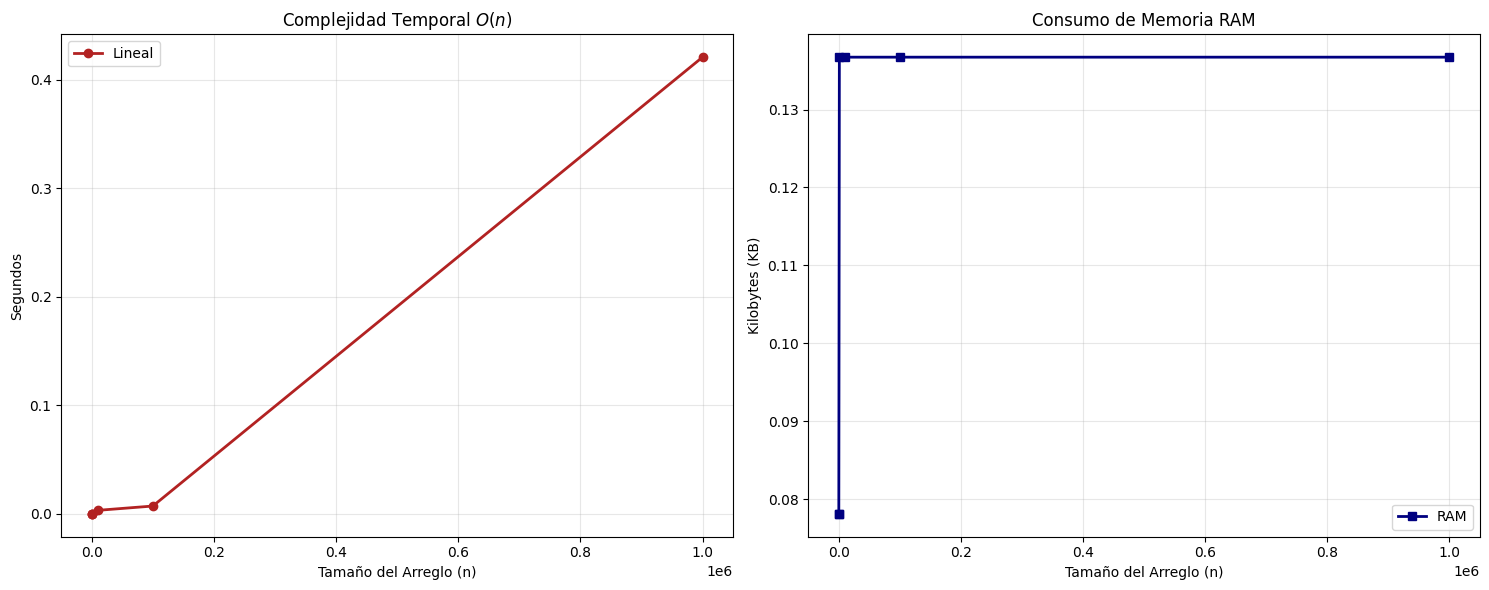

In [ ]:
#busqueda lineal en Python
import time
import tracemalloc
import random
import sys
import matplotlib.pyplot as plt

arr = [42, 17, 89, 23, 56, 71, 10, 95, 34, 68]
obj = int(input("Ingrese el numero a buscar: "))

def buscar_numero(arr, obj):
    for i in range(len(arr)):
        if arr[i] == obj:
            return i+1
    return -1

resultado = buscar_numero(arr, obj)

if resultado == -1:
    print(f"El numero {obj} no se encuentra en el arreglo.")
else:
 print(f"El numero {obj} se encuentra en la posicion: {resultado}")
 print(f"El arreglo tiene: {len(arr)} elementos.")


# --- INICIO DEL LABORATORIO DE RENDIMIENTO ---

# Tamaños de prueba (hasta 1,000,000)
tamanos = [10, 100, 1000, 10000, 100000, 1000000]
tiempos = []
memoria = []

print("\n Iniciando pruebas de rendimiento para Búsqueda Lineal")

for n in tamanos:
    # Generar arreglo aleatorio (no necesita estar ordenado para esta búsqueda)
    lista_prueba = [random.randint(0, n * 10) for _ in range(n)]
    
    # Seleccionamos un número al azar que SABEMOS que está en la lista
    objetivo = random.choice(lista_prueba)
    
    tracemalloc.start()
    inicio_t = time.time()
    
    # --- Ejecutamos la Búsqueda Lineal ---
    buscar_numero(lista_prueba, objetivo)
    
    fin_t = time.time()
    pico_memoria = tracemalloc.get_traced_memory()[1] / 1024 # KB
    tracemalloc.stop()
    
    tiempos.append(fin_t - inicio_t)
    memoria.append(pico_memoria)
    
    print(f"n={n:<10} | Buscado: {objetivo:<8} | Tiempo: {fin_t - inicio_t:>10.7f}s | RAM: {pico_memoria:>8.2f} KB")

# 3. GENERACIÓN DE GRÁFICAS
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfica de Tiempo (Complejidad Lineal O(n))
ax1.plot(tamanos, tiempos, marker='o', color='firebrick', linewidth=2, label='Lineal')
ax1.set_title('Complejidad Temporal $O(n)$')
ax1.set_xlabel('Tamaño del Arreglo (n)')
ax1.set_ylabel('Segundos')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Gráfica de Memoria
ax2.plot(tamanos, memoria, marker='s', color='navy', linewidth=2, label='RAM')
ax2.set_title('Consumo de Memoria RAM')
ax2.set_xlabel('Tamaño del Arreglo (n)')
ax2.set_ylabel('Kilobytes (KB)')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

Arreglo ordenado: [2, 7, 12, 15, 31, 42, 55, 63, 89, 98]
¡Éxito! El número 98 está en la posición 10 del arreglo ordenado.

 Iniciando pruebas de rendimiento para Jump Search (Tiempo y RAM)...
n=10         | Buscado: 49       | Tiempo:  0.0000687s | RAM:     0.00 KB
n=100        | Buscado: 495      | Tiempo:  0.0000131s | RAM:     0.00 KB
n=1000       | Buscado: 7249     | Tiempo:  0.0000763s | RAM:     0.12 KB
n=10000      | Buscado: 43008    | Tiempo:  0.0002050s | RAM:     0.12 KB
n=100000     | Buscado: 873717   | Tiempo:  0.0012479s | RAM:     0.12 KB
n=1000000    | Buscado: 82865    | Tiempo:  0.0004151s | RAM:     0.12 KB


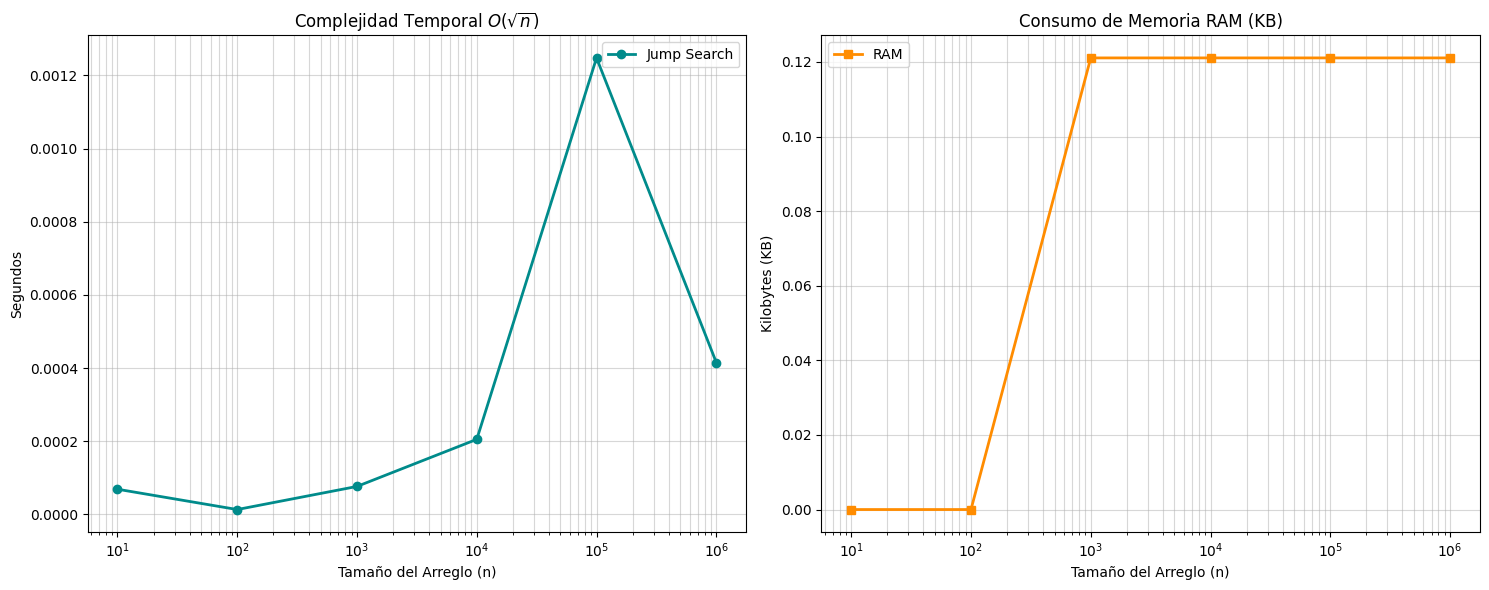

In [ ]:
#busqueda jump en Python
import time
import tracemalloc
import random
import sys
import matplotlib.pyplot as plt
import math

arr = [42, 7, 89, 15, 63, 2, 31, 55, 98, 12]

def ord_quick(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[len(arr) // 2]
        izq = [x for x in arr if x < pivot]
        centr = [x for x in arr if x == pivot]
        der = [x for x in arr if x > pivot]
        return ord_quick(izq) + centr + ord_quick(der)


arreglo_ordenado = ord_quick(arr)
print(f"Arreglo ordenado: {arreglo_ordenado}")


def busqueda_jump(arr, obj):
    n = len(arr)
    salto = int(math.sqrt(n))
    anter = 0
    
    while arr[min(salto, n) - 1] < obj:
        anter = salto
        salto += int(math.sqrt(n))
        if anter >= n:
            return -1
    
 
    while arr[anter] < obj:
        anter += 1
        

        if anter == min(salto, n):
            return -1
            

    if arr[anter] == obj:
        return anter
    
    return -1

numero_objetivo = int(input("\n¿Qué número deseas buscar en el arreglo?: "))

indice_encontrado = busqueda_jump(arreglo_ordenado, numero_objetivo)

if indice_encontrado != -1:
        print(f"¡Éxito! El número {numero_objetivo} está en la posición {indice_encontrado+1} del arreglo ordenado.")
else:
        print(f"Lo siento, el número {numero_objetivo} no se encuentra en la lista.")

# --- INICIO DEL LABORATORIO DE RENDIMIENTO ---

tamanos = [10, 100, 1000, 10000, 100000, 1000000]
tiempos = []
memoria = []

print("\n Iniciando pruebas de rendimiento para Jump Search (Tiempo y RAM)...")

for n in tamanos:
    # Generar arreglo aleatorio y ordenarlo (usamos sorted() de Python para preparar rápido la prueba)
    lista_base = [random.randint(0, n * 10) for _ in range(n)]
    lista_ordenada = sorted(lista_base)
    
    # Elegimos un número al azar que SABEMOS que está en la lista para medir el "Caso Promedio"
    objetivo = random.choice(lista_ordenada)
    
    # --- MEDICIÓN DE RECURSOS ---
    tracemalloc.start()
    inicio_t = time.time()
    
    # Ejecutamos TU búsqueda por salto
    busqueda_jump(lista_ordenada, objetivo)
    
    fin_t = time.time()
    # Capturamos el pico de RAM en KB
    pico_ram = tracemalloc.get_traced_memory()[1] / 1024 
    tracemalloc.stop()
    
    tiempos.append(fin_t - inicio_t)
    memoria.append(pico_ram)
    
    print(f"n={n:<10} | Buscado: {objetivo:<8} | Tiempo: {fin_t - inicio_t:>10.7f}s | RAM: {pico_ram:>8.2f} KB")

# 3. GENERACIÓN DE GRÁFICAS
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfica de Tiempo (Complejidad O(√n))
ax1.plot(tamanos, tiempos, marker='o', color='darkcyan', linewidth=2, label='Jump Search')
ax1.set_xscale('log')
ax1.set_title(r'Complejidad Temporal $O(\sqrt{n})$')
ax1.set_xlabel('Tamaño del Arreglo (n)')
ax1.set_ylabel('Segundos')
ax1.grid(True, which="both", ls="-", alpha=0.5)
ax1.legend()

# Gráfica de Memoria
ax2.plot(tamanos, memoria, marker='s', color='darkorange', linewidth=2, label='RAM')
ax2.set_xscale('log')
ax2.set_title('Consumo de Memoria RAM (KB)')
ax2.set_xlabel('Tamaño del Arreglo (n)')
ax2.set_ylabel('Kilobytes (KB)')
ax2.grid(True, which="both", ls="-", alpha=0.5)
ax2.legend()

plt.tight_layout()
plt.show()